<a href="https://colab.research.google.com/github/3mo0o0ry2001/Airline-Delay-NeuralNetwork-BC-/blob/main/Airdelay_NeuralNetwork_(BC).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#importing the libraries

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
data = pd.read_csv('/content/Airline_Delay_Cause CSV.csv')    #Loading the data
data

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,...,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,2022,5,9E,Endeavor Air Inc.,ABE,"Allentown/Bethlehem/Easton, PA: Lehigh Valley ...",136.0,7.0,5.95,0.00,...,0.0,1.00,0.0,0.0,255.0,222.0,0.0,4.0,0.0,29.0
1,2022,5,9E,Endeavor Air Inc.,ABY,"Albany, GA: Southwest Georgia Regional",91.0,16.0,7.38,0.00,...,0.0,6.09,0.0,0.0,884.0,351.0,0.0,81.0,0.0,452.0
2,2022,5,9E,Endeavor Air Inc.,ACK,"Nantucket, MA: Nantucket Memorial",19.0,2.0,0.13,0.00,...,0.0,0.88,1.0,0.0,138.0,4.0,0.0,106.0,0.0,28.0
3,2022,5,9E,Endeavor Air Inc.,AEX,"Alexandria, LA: Alexandria International",88.0,14.0,7.26,0.76,...,0.0,1.64,0.0,0.0,947.0,585.0,35.0,125.0,0.0,202.0
4,2022,5,9E,Endeavor Air Inc.,AGS,"Augusta, GA: Augusta Regional at Bush Field",181.0,19.0,13.84,0.00,...,0.0,2.09,0.0,0.0,808.0,662.0,0.0,87.0,0.0,59.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318012,2003,6,DL,Delta Air Lines Inc.,SEA,"Seattle, WA: Seattle/Tacoma International",480.0,84.0,25.69,3.09,...,0.0,21.26,0.0,0.0,3744.0,978.0,164.0,1023.0,0.0,1579.0
318013,2003,6,DL,Delta Air Lines Inc.,SFO,"San Francisco, CA: San Francisco International",505.0,111.0,21.78,2.24,...,0.0,13.17,3.0,0.0,4284.0,1376.0,138.0,2132.0,0.0,638.0
318014,2003,6,DL,Delta Air Lines Inc.,SJC,"San Jose, CA: Norman Y. Mineta San Jose Intern...",146.0,36.0,6.99,0.00,...,0.0,2.15,0.0,0.0,896.0,205.0,0.0,607.0,0.0,84.0
318015,2003,6,DL,Delta Air Lines Inc.,SJU,"San Juan, PR: Luis Munoz Marin International",95.0,13.0,3.66,0.00,...,0.0,1.42,0.0,0.0,367.0,120.0,0.0,210.0,0.0,37.0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318017 entries, 0 to 318016
Data columns (total 21 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   year                 318017 non-null  int64  
 1   month                318017 non-null  int64  
 2   carrier              318013 non-null  object 
 3   carrier_name         318013 non-null  object 
 4   airport              318014 non-null  object 
 5   airport_name         318017 non-null  object 
 6   arr_flights          317524 non-null  float64
 7   arr_del15            317285 non-null  float64
 8   carrier_ct           317525 non-null  float64
 9   weather_ct           317523 non-null  float64
 10  nas_ct               317529 non-null  float64
 11  security_ct          317529 non-null  float64
 12  late_aircraft_ct     317529 non-null  float64
 13  arr_cancelled        317529 non-null  float64
 14  arr_diverted         317527 non-null  float64
 15  arr_delay        

In [4]:
data = data.drop(['carrier', 'carrier_name', 'airport', 'airport_name'], axis=1)  #Dropping the columns
data
data.dropna(inplace=True)  #Dropping the null values

In [5]:
data['weather_delay'].min(),data['weather_delay'].max()  #min and max values

(0.0, 57707.0)

In [6]:
data['WDCase'] = data['weather_delay'].apply(lambda x: 1 if x > 100 else 0)  #Creating the new column (WDCase)
data['WDCase'].value_counts()

,count
WDCase,
0,215116
1,102152


In [7]:
data

,year,month,arr_flights,arr_del15,carrier_ct,weather_ct,nas_ct,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,WDCase
0,2022,5,136.0,7.0,5.95,0.00,0.05,0.0,1.00,0.0,0.0,255.0,222.0,0.0,4.0,0.0,29.0,0
1,2022,5,91.0,16.0,7.38,0.00,2.54,0.0,6.09,0.0,0.0,884.0,351.0,0.0,81.0,0.0,452.0,0
2,2022,5,19.0,2.0,0.13,0.00,1.00,0.0,0.88,1.0,0.0,138.0,4.0,0.0,106.0,0.0,28.0,0
3,2022,5,88.0,14.0,7.26,0.76,4.35,0.0,1.64,0.0,0.0,947.0,585.0,35.0,125.0,0.0,202.0,0
4,2022,5,181.0,19.0,13.84,0.00,3.07,0.0,2.09,0.0,0.0,808.0,662.0,0.0,87.0,0.0,59.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318012,2003,6,480.0,84.0,25.69,3.09,33.96,0.0,21.26,0.0,0.0,3744.0,978.0,164.0,1023.0,0.0,1579.0,1
318013,2003,6,505.0,111.0,21.78,2.24,73.81,0.0,13.17,3.0,0.0,4284.0,1376.0,138.0,2132.0,0.0,638.0,1
318014,2003,6,146.0,36.0,6.99,0.00,26.85,0.0,2.15,0.0,0.0,896.0,205.0,0.0,607.0,0.0,84.0,0
318015,2003,6,95.0,13.0,3.66,0.00,7.92,0.0,1.42,0.0,0.0,367.0,120.0,0.0,210.0,0.0,37.0,0


In [8]:
X = data.drop(['WDCase'], axis=1)  #Dropping the target column
y = data['WDCase']  #Target column

In [9]:
X

,year,month,arr_flights,arr_del15,carrier_ct,weather_ct,nas_ct,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,2022,5,136.0,7.0,5.95,0.00,0.05,0.0,1.00,0.0,0.0,255.0,222.0,0.0,4.0,0.0,29.0
1,2022,5,91.0,16.0,7.38,0.00,2.54,0.0,6.09,0.0,0.0,884.0,351.0,0.0,81.0,0.0,452.0
2,2022,5,19.0,2.0,0.13,0.00,1.00,0.0,0.88,1.0,0.0,138.0,4.0,0.0,106.0,0.0,28.0
3,2022,5,88.0,14.0,7.26,0.76,4.35,0.0,1.64,0.0,0.0,947.0,585.0,35.0,125.0,0.0,202.0
4,2022,5,181.0,19.0,13.84,0.00,3.07,0.0,2.09,0.0,0.0,808.0,662.0,0.0,87.0,0.0,59.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318012,2003,6,480.0,84.0,25.69,3.09,33.96,0.0,21.26,0.0,0.0,3744.0,978.0,164.0,1023.0,0.0,1579.0
318013,2003,6,505.0,111.0,21.78,2.24,73.81,0.0,13.17,3.0,0.0,4284.0,1376.0,138.0,2132.0,0.0,638.0
318014,2003,6,146.0,36.0,6.99,0.00,26.85,0.0,2.15,0.0,0.0,896.0,205.0,0.0,607.0,0.0,84.0
318015,2003,6,95.0,13.0,3.66,0.00,7.92,0.0,1.42,0.0,0.0,367.0,120.0,0.0,210.0,0.0,37.0


In [10]:
y

,WDCase
0,0
1,0
2,0
3,0
4,0
...,...
318012,1
318013,1
318014,0
318015,0


In [11]:
#Splitting the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=44, shuffle=True)

print('X_train is ', X_train.shape)
print('X_test is ', X_test.shape)
print('y_train is ', y_train.shape)
print('y_test is ', y_test.shape)

X_train is  (237951, 17)
X_test is  (79317, 17)
y_train is  (237951,)
y_test is  (79317,)


In [12]:
import keras
import tensorflow as tf

# Build the model
KerasModel = keras.models.Sequential([
    keras.layers.Dense(8, activation='tanh'),       #layer #1
    keras.layers.Dense(128, activation='tanh'),     #layer #2
    keras.layers.Dense(64, activation='tanh'),      #layer #3
    keras.layers.Dropout(0.2),                      #Dropout (20%)
    keras.layers.Dense(1, activation='sigmoid'),    #layer #4
])

In [13]:
# Compile the model
KerasModel.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


# Regression : MSE
# BC : binary_crossentropy, accuracy
# MC : categorical_crossentropy, accuracy

In [14]:
#training
history = KerasModel.fit(X_train, y_train,  #Training data
                         validation_data=(X_test, y_test),  #Validation data
                         epochs=100,  #No. of epochs
                         batch_size=10000,  #Batch size
                         verbose=1,  #Verbosity
                         callbacks=[tf.keras.callbacks.EarlyStopping(patience=10, monitor='val_accuracy', restore_best_weights=True)])  #Early stopping


Epoch 1/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 9s 101ms/step - accuracy: 0.7379 - loss: 0.5318 - val_accuracy: 0.7964 - val_loss: 0.4498
Epoch 2/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 67ms/step - accuracy: 0.7984 - loss: 0.4488 - val_accuracy: 0.8013 - val_loss: 0.4378
Epoch 3/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 81ms/step - accuracy: 0.8037 - loss: 0.4365 - val_accuracy: 0.8055 - val_loss: 0.4257
Epoch 4/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 77ms/step - accuracy: 0.8080 - loss: 0.4241 - val_accuracy: 0.8106 - val_loss: 0.4139
Epoch 5/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 70ms/step - accuracy: 0.8112 - loss: 0.4135 - val_accuracy: 0.8126 - val_loss: 0.4052
Epoch 6/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 97ms/step - accuracy: 0.8135 - loss: 0.4012 - val_accuracy: 0.8111 - val_loss: 0.3938
Epoch 7/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 92ms/step - accuracy: 0.8103 - loss: 0.3944 - val_accuracy: 0.8123 - val_loss: 0.3852
Epoch 8/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - accuracy: 0.8183 - loss: 0.3833 - val_accuracy: 0

In [15]:
print(KerasModel.summary())  #Model Summary

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 8)                   │             144 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │           1,152 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 28,853 (112.71 KB)

 Trainable params: 9,617 (37.57 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 19,236 (75.14 KB)

None


In [16]:
KerasModel.save('KerasModel.h5')  #Saving the model
NewKerasModel = keras.models.load_model('KerasModel.h5')  #Loading the model

In [17]:
#Prediction

y_pred = NewKerasModel.predict(X_test)
print('prediction shape is {}'.format(y_pred.shape))
print('prediction items are {}'.format(y_pred[:5]))

2479/2479 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step
prediction shape is (79317, 1)
prediction items are [[9.9980932e-01]
 [9.9981439e-01]
 [9.6063282e-05]
 [9.6063282e-05]
 [9.6941294e-05]]


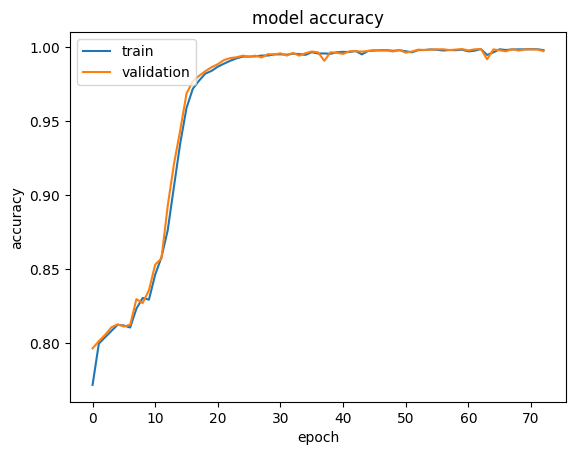

In [18]:
#accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

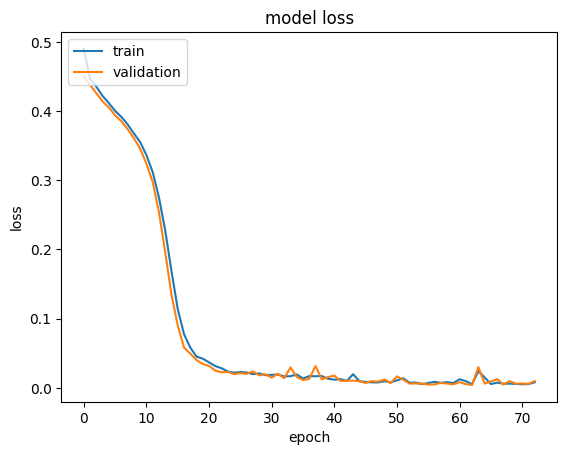

In [19]:
#Loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [20]:
len(y_test), len(y_pred)

(79317, 79317)

In [21]:
y_pred = [np.round(i) for i in y_pred]  #y_pred round
y_pred  #y_pred items

[array([1.], dtype=float32),
 array([1.], dtype=float32),
 array([0.], dtype=float32),
 array([0.], dtype=float32),
 array([0.], dtype=float32),
 array([0.], dtype=float32),
 array([1.], dtype=float32),
 array([1.], dtype=float32),
 array([0.], dtype=float32),
 array([0.], dtype=float32),
 array([1.], dtype=float32),
 array([0.], dtype=float32),
 array([0.], dtype=float32),
 array([0.], dtype=float32),
 array([1.], dtype=float32),
 array([0.], dtype=float32),
 array([1.], dtype=float32),
 array([1.], dtype=float32),
 array([0.], dtype=float32),
 array([0.], dtype=float32),
 array([0.], dtype=float32),
 array([1.], dtype=float32),
 array([0.], dtype=float32),
 array([0.], dtype=float32),
 array([0.], dtype=float32),
 array([0.], dtype=float32),
 array([0.], dtype=float32),
 array([0.], dtype=float32),
 array([0.], dtype=float32),
 array([0.], dtype=float32),
 array([1.], dtype=float32),
 array([0.], dtype=float32),
 array([1.], dtype=float32),
 array([0.], dtype=float32),
 array([0.], d

In [22]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

#confusion matrix
cm = confusion_matrix(y_test, y_pred)
print('Confustion Matrix is \n', cm)

Confustion Matrix is 
 [[53677    47]
 [   44 25549]]


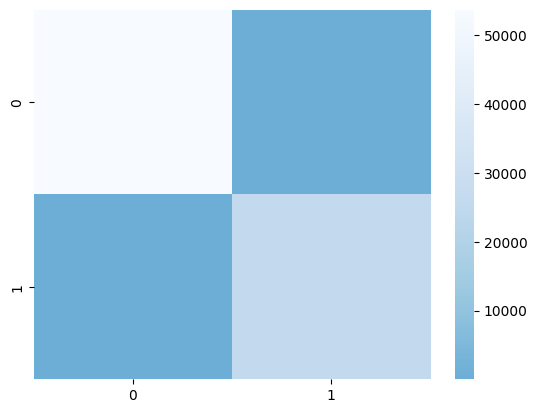

In [23]:
#drawing confusion Matrix
sns.heatmap(cm, center=True, cmap='Blues_r')
plt.show()

In [24]:
from sklearn.metrics import classification_report
ClassificationReport = classification_report(y_test, y_pred)
print('Classification Report is \n', ClassificationReport)

Classification Report is 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     53724
           1       1.00      1.00      1.00     25593

    accuracy                           1.00     79317
   macro avg       1.00      1.00      1.00     79317
weighted avg       1.00      1.00      1.00     79317

